In [2]:
import pandas as pd
Crop_data=pd.read_csv('/content/Crop_recommendation.csv')
Crop_data.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [13]:
Crop_data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [14]:
black_soil_crops= ['cotton', 'maize', 'chickpea', 'pigeonpeas',
                    'mothbeans', 'blackgram', 'lentil', 'jute']
Crop_data['soil']='other'


In [15]:
Crop_data.loc[Crop_data['label'].isin(black_soil_crops), 'soil']= 'Black'

In [16]:
Black_Soil_data= Crop_data[Crop_data['soil']=='Black']

In [17]:
Black_Soil_data.head()

,N,P,K,temperature,humidity,ph,rainfall,label,soil
100,71,54,16,22.613600,63.690706,5.749914,87.759539,maize,Black
101,61,44,17,26.100184,71.574769,6.931757,102.266244,maize,Black
102,80,43,16,23.558821,71.593514,6.657965,66.719955,maize,Black
103,73,58,21,19.972160,57.682729,6.596061,60.651715,maize,Black
104,61,38,20,18.478913,62.695039,5.970458,65.438354,maize,Black


In [21]:
Black_Soil_data['label'].unique()

array(['maize', 'chickpea', 'pigeonpeas', 'mothbeans', 'blackgram',
       'lentil', 'cotton', 'jute'], dtype=object)

In [24]:
Black_Soil_data.drop(['temperature','ph','rainfall'],axis=1, inplace=True)

<ipython-input-24-5cc048aca67c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Black_Soil_data.drop(['temperature','ph','rainfall'],axis=1, inplace=True)


In [26]:
Black_Soil_data.rename(columns={'label':'crop'})

,N,P,K,humidity,crop,soil
100,71,54,16,63.690706,maize,Black
101,61,44,17,71.574769,maize,Black
102,80,43,16,71.593514,maize,Black
103,73,58,21,57.682729,maize,Black
104,61,38,20,62.695039,maize,Black
...,...,...,...,...,...,...
2095,87,44,43,86.792613,jute,Black
2096,88,52,39,88.071123,jute,Black
2097,90,39,37,81.686889,jute,Black
2098,90,39,43,82.286484,jute,Black


In [27]:
Black_Soil_data = Black_Soil_data.sample(frac=1).reset_index(drop=True)

In [28]:
Black_Soil_data.head()

,N,P,K,humidity,label,soil
0,2,78,23,66.439346,lentil,Black
1,25,35,20,43.353657,mothbeans,Black
2,48,61,21,61.692951,blackgram,Black
3,37,71,16,68.519667,lentil,Black
4,99,38,21,71.597224,maize,Black


In [31]:
# CPD= Crop Prediction Data
CPD=pd.read_csv('/content/Black_Soil_data.csv')

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
CPD.describe()

,N,P,K,humidity
count,800.00000,800.000000,800.000000,800.000000
mean,51.87250,57.612500,29.803750,59.072661
std,35.55459,12.641186,20.317079,19.866287
min,0.00000,35.000000,15.000000,14.258040
25%,24.00000,47.000000,18.000000,50.686308
50%,40.00000,58.000000,21.000000,63.406446
75%,77.00000,68.000000,27.500000,72.606407
max,140.00000,80.000000,85.000000,89.891065


Heat map to check null values

<Axes: >

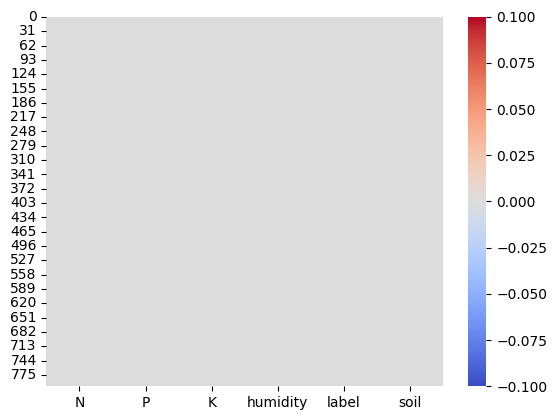

In [34]:
sns.heatmap(CPD.isnull(), cmap='coolwarm')

<ipython-input-35-4cb4104976f8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='label',data=CPD, palette="plasma_r")


<Axes: xlabel='count', ylabel='label'>

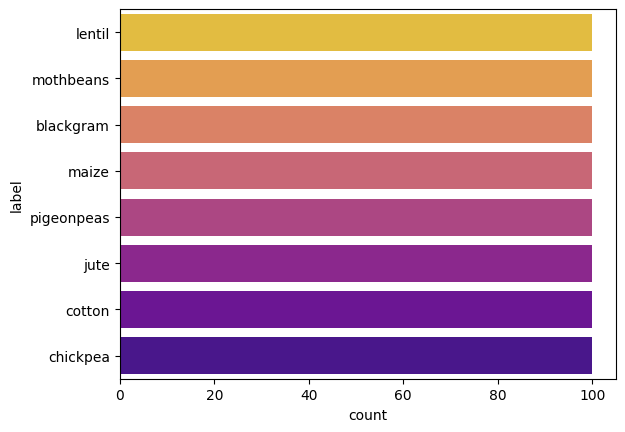

In [35]:
sns.countplot(y='label',data=CPD, palette="plasma_r")

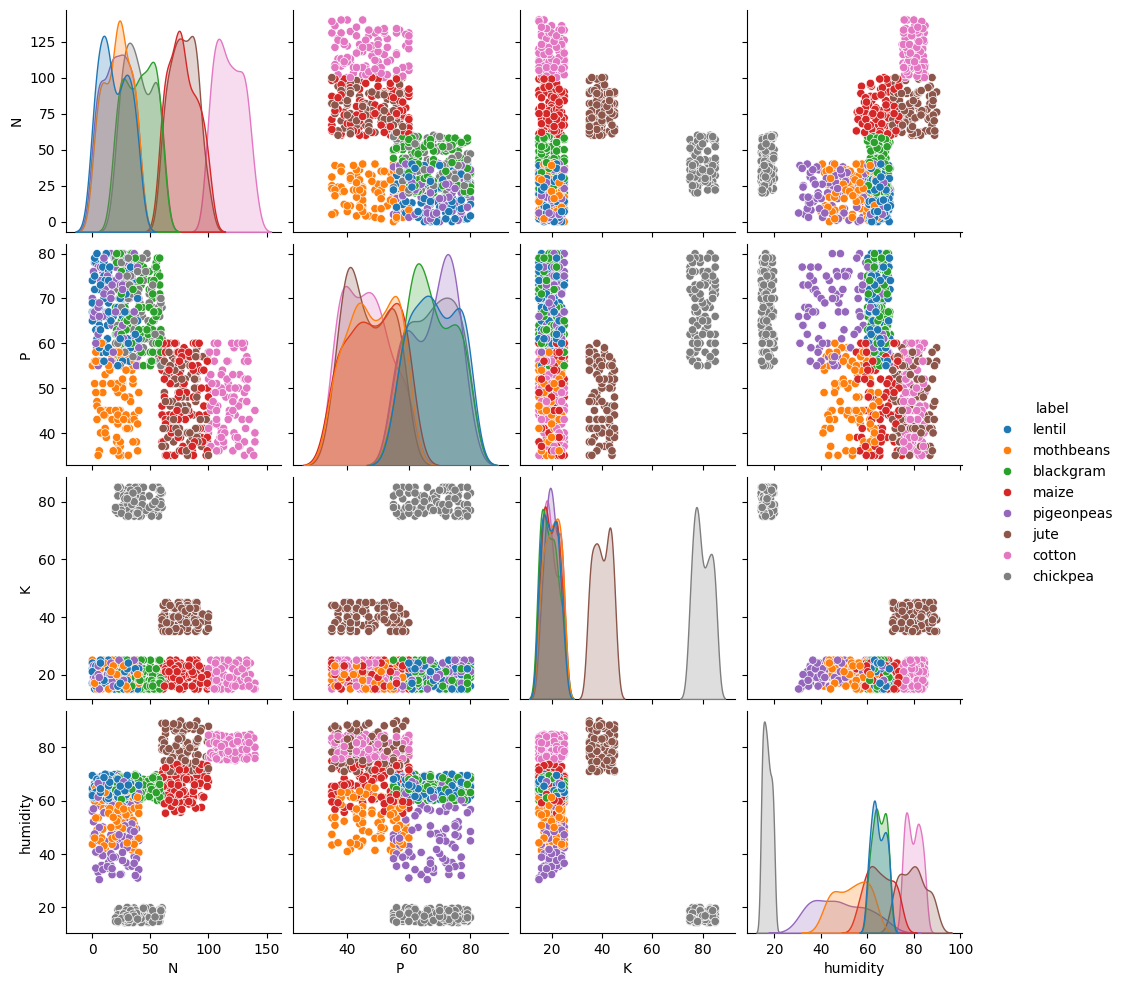

In [36]:
sns.pairplot(CPD, hue='label')

In [38]:
I=CPD.label.astype('category')
targets=dict(enumerate(I.cat.categories))
CPD['crop']=I.cat.codes

In [101]:
targets

{0: 'blackgram',
 1: 'chickpea',
 2: 'cotton',
 3: 'jute',
 4: 'lentil',
 5: 'maize',
 6: 'mothbeans',
 7: 'pigeonpeas'}

In [39]:
y=CPD.crop
x=CPD[['N','P','K','humidity']]

<Axes: >

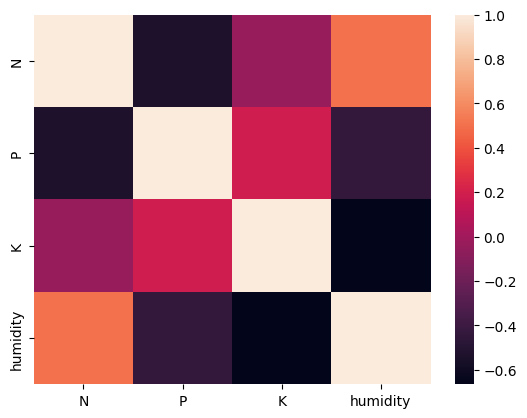

In [40]:
sns.heatmap(x.corr())

Feature Scaling

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

x_train, x_test, y_train, y_test= train_test_split(x,y, random_state=1)
scaler=MinMaxScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

### Model Selection


Support Vector Classifier

In [42]:
from sklearn.svm import SVC
SVC_linear=SVC(kernel='linear').fit(x_train_scaled,y_train)
print('Linear Kernel Accuracy: ',SVC_linear.score(x_test_scaled,y_test))
SVC_rbf=SVC(kernel='rbf').fit(x_train_scaled,y_train)
print('RBF Kernel Accuracy: ', SVC_rbf.score(x_test_scaled,y_test))
SVC_poly=SVC(kernel='poly').fit(x_train_scaled,y_train)
print('Ploy Kernel Accuracy: ',SVC_poly.score(x_test_scaled,y_test))

Linear Kernel Accuracy:  0.82
RBF Kernel Accuracy:  0.83
Ploy Kernel Accuracy:  0.845


In [44]:
import numpy as np

In [45]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

parameters = {'C': np.logspace(-3, 2, 6).tolist(), 'gamma': np.logspace(-3, 2, 6).tolist()}
# 'degree': np.arange(0,5,1).tolist(), 'kernel':['linear','rbf','poly']

model = GridSearchCV(estimator = SVC(kernel="linear"), param_grid=parameters, n_jobs=-1, cv=4)
model.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                         'gamma': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]})

In [46]:
print(model.best_score_ )
print(model.best_params_ )

0.875
{'C': 0.1, 'gamma': 0.001}


In [52]:
model_rbf = GridSearchCV(estimator = SVC(kernel="rbf"), param_grid=parameters, n_jobs=-1, cv=4)
model_rbf.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                         'gamma': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]})

In [53]:
print(model_rbf.best_score_ )
print(model_rbf.best_params_ )

0.8816666666666667
{'C': 10.0, 'gamma': 0.001}


KNN


In [94]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train_scaled, y_train)
knn.score(x_test_scaled, y_test)

0.82

Decision Tree Classifier

In [88]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(random_state=42).fit(x_train,y_train)
clf.score(x_test,y_test)

0.815

Random Forest

In [91]:
from sklearn.ensemble import RandomForestClassifier
clf_r=RandomForestClassifier(max_depth=4, n_estimators=150, random_state=1).fit(x_train,y_train)
print('RF Accuracy on training set: {:.2f}'.format(clf_r.score(x_train, y_train)))
print('RF Accuracy on test set: {:.2f}'.format(clf_r.score(x_test, y_test)))

RF Accuracy on training set: 0.90
RF Accuracy on test set: 0.86


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


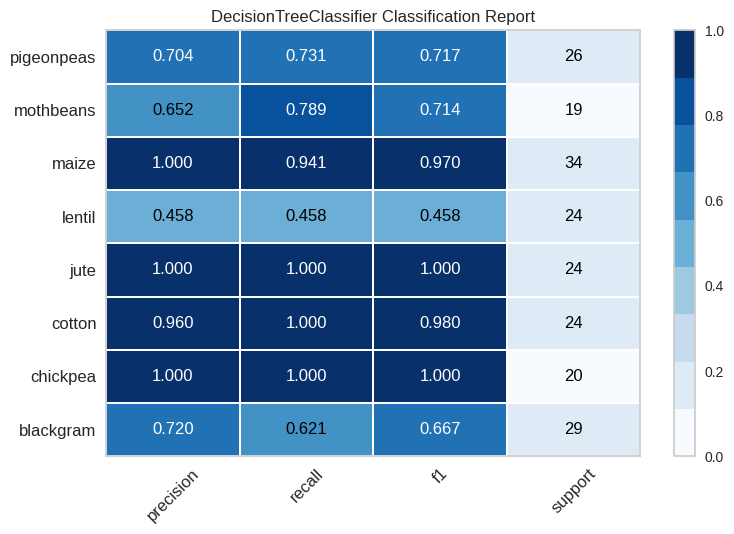

<Axes: title={'center': 'DecisionTreeClassifier Classification Report'}>

In [89]:
from yellowbrick.classifier import ClassificationReport
classes=list(targets.values())
visualizer = ClassificationReport(clf, classes=classes, support=True,cmap="Blues")

visualizer.fit(x_train, y_train)  # Fit the visualizer and the model
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.show()

Gradient Boosting


In [90]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier().fit(x_train,y_train)
print('Gradient  Boosting Accuracy: {}'.format(grad.score(x_test,y_test)))

Gradient  Boosting Accuracy: 0.855


In [97]:
print('Linear Kernel Accuracy: ',SVC_linear.score(x_test_scaled,y_test))
print('RBF Kernel Accuracy: ', SVC_rbf.score(x_test_scaled,y_test))
print('Ploy Kernel Accuracy: ',SVC_poly.score(x_test_scaled,y_test))
print('Linear Kernal Accuracy after applying GridSearchCV: ', model.best_score_ )
print('Linear Best Parameters: ',model.best_params_ )
print('RBF Kernal Accuracy after applying GridSearchCV: ',model_rbf.best_score_)
print('RBF Best Parameters: ',model_rbf.best_params_ )
print('Accuracy of the KNN model: ', knn.score(x_test_scaled, y_test))
print('DecisionTreeClassifier Accuracy: ',clf.score(x_test,y_test))
print('RandomForestClassifier Accuracy on test set: {:.2f}'.format(clf_r.score(x_test, y_test)))
print('Gradient  Boosting Accuracy: {}'.format(grad.score(x_test,y_test)))

Linear Kernel Accuracy:  0.82
RBF Kernel Accuracy:  0.83
Ploy Kernel Accuracy:  0.845
Linear Kernal Accuracy after applying GridSearchCV:  0.875
Linear Best Parameters:  {'C': 0.1, 'gamma': 0.001}
RBF Kernal Accuracy after applying GridSearchCV:  0.8816666666666667
RBF Best Parameters:  {'C': 10.0, 'gamma': 0.001}
Accuracy of the KNN model:  0.82
DecisionTreeClassifier Accuracy:  0.815
RandomForestClassifier Accuracy on test set: 0.86
Gradient  Boosting Accuracy: 0.855


In [98]:
import pandas as pd

# Initialize a list to store the results
results = []

# Collecting model results
results.append({
    'Model': 'SVC (Linear Kernel)',
    'Accuracy': SVC_linear.score(x_test_scaled, y_test),
    'Best Parameters': None
})

results.append({
    'Model': 'SVC (RBF Kernel)',
    'Accuracy': SVC_rbf.score(x_test_scaled, y_test),
    'Best Parameters': None
})

results.append({
    'Model': 'SVC (Poly Kernel)',
    'Accuracy': SVC_poly.score(x_test_scaled, y_test),
    'Best Parameters': None
})

results.append({
    'Model': 'SVC (Linear Kernel) GridSearchCV',
    'Accuracy': model.best_score_,
    'Best Parameters': model.best_params_
})

results.append({
    'Model': 'SVC (RBF Kernel) GridSearchCV',
    'Accuracy': model_rbf.best_score_,
    'Best Parameters': model_rbf.best_params_
})

results.append({
    'Model': 'KNN',
    'Accuracy': knn.score(x_test_scaled, y_test),
    'Best Parameters': None
})

results.append({
    'Model': 'Decision Tree Classifier',
    'Accuracy': clf.score(x_test, y_test),
    'Best Parameters': None
})

results.append({
    'Model': 'Random Forest Classifier',
    'Accuracy': clf_r.score(x_test, y_test),
    'Best Parameters': None
})

results.append({
    'Model': 'Gradient Boosting',
    'Accuracy': grad.score(x_test, y_test),
    'Best Parameters': None
})

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Display the results as a table
print(results_df)


                              Model  Accuracy              Best Parameters
0               SVC (Linear Kernel)  0.820000                         None
1                  SVC (RBF Kernel)  0.830000                         None
2                 SVC (Poly Kernel)  0.845000                         None
3  SVC (Linear Kernel) GridSearchCV  0.875000   {'C': 0.1, 'gamma': 0.001}
4     SVC (RBF Kernel) GridSearchCV  0.881667  {'C': 10.0, 'gamma': 0.001}
5                               KNN  0.820000                         None
6          Decision Tree Classifier  0.815000                         None
7          Random Forest Classifier  0.860000                         None
8                 Gradient Boosting  0.855000                         None


In [99]:
import joblib
from google.colab import files

# Save the best model
best_model = model_rbf.best_estimator_
joblib.dump(best_model, 'svc_rbf_model.joblib')

# If using Google Colab, download the file
files.download('svc_rbf_model.joblib')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [104]:
import numpy as np
import pandas as pd
import joblib

def load_model(model_path):
    """Load the trained model from the specified path."""
    return joblib.load(model_path)

def get_user_input():
    """Get user input for Nitrogen, Phosphorus, Potassium, and humidity."""
    N = float(input("Enter Nitrogen (N) value: "))
    P = float(input("Enter Phosphorus (P) value: "))
    K = float(input("Enter Potassium (K) value: "))
    humidity = float(input("Enter Humidity (in percentage): "))
    # Create a DataFrame with feature names
    return pd.DataFrame([[N, P, K, humidity]], columns=['N', 'P', 'K', 'humidity'])

def predict_crop(model, input_data):
    """Make a prediction using the loaded model."""
    return model.predict(input_data)

def decode_crop_label(predicted_label, targets):
    """Decode the predicted label back to the crop name."""
    return targets[predicted_label]

def recommend_crop():
    """Main function to recommend a crop based on user input."""
    model_path = 'svc_rbf_model.joblib'  # Path to your model file
    model = load_model(model_path)  # Load the trained model
    input_data = get_user_input()  # Get user input
    predicted_label = predict_crop(model, input_data)  # Make prediction

    # Decoding the predicted crop label
    I = ['blackgram', 'chickpea', 'cotton', 'jute', 'lentil', 'maize', 'mothbeans', 'pigeonpeas']  # List of crops
    crop_name = decode_crop_label(predicted_label[0], I)  # Get crop name using predicted label

    print(f'The recommended crop is: {crop_name}')  # Output recommendation

# Run the function to recommend a crop
recommend_crop()


Enter Nitrogen (N) value: 62
Enter Phosphorus (P) value: 49
Enter Potassium (K) value: 37
Enter Humidity (in percentage): 82.852
The recommended crop is: jute


In [105]:
recommend_crop()

Enter Nitrogen (N) value: 60
Enter Phosphorus (P) value: 25
Enter Potassium (K) value: 25
Enter Humidity (in percentage): 59.56
The recommended crop is: maize
